In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
#loading the data
(train_data, train_labels), (test_data,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)

(60000, 28, 28)


In [0]:
#reshaping the training data as 4D tensor
train_data = train_data.reshape(train_data.shape+(1,))
train_data = train_data.astype('float32') / 255

In [0]:
test_data = test_data.reshape(test_data.shape+(1,))
test_data = test_data.astype('float32') / 255

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [0]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["acc"])

In [13]:
model.fit(train_data,train_labels,epochs=5,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.1793 - acc: 0.9438
Epoch 2/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.0481 - acc: 0.9855
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0328 - acc: 0.9894
Epoch 4/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0249 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.0199 - acc: 0.9942


In [14]:
test_loss, test_acc = model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 1s 93us/step


In [15]:
print(test_acc)

0.992


In [0]:
img = cv2.imread("image.jpg",0)
img = img.astype('float32') / 255
img = cv2.resize(img,(28,28))
img = img.reshape(1,28,28,1)
prediction = model.predict(img)

In [109]:
print(prediction)
print("predicted class : ",np.argmax(prediction))

[[2.8674193e-02 2.4402821e-03 7.5371104e-01 5.0836761e-04 2.1000737e-02
  1.4062279e-03 1.5739433e-03 6.9845875e-05 1.6872714e-01 2.1888165e-02]]
predicted class :  2


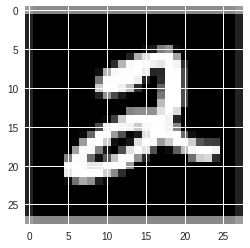

In [110]:
plt.imshow(img.reshape(28,28))

In [0]:
img3 = cv2.imread("0.jpg",0)
img3 = img3.astype('float32') / 255
img3 = cv2.resize(img3,(28,28))
img3 = img3.reshape((1,28,28,1))
prediction3 = model.predict(img3)

In [112]:
print(prediction3)
print("predicted class : ",np.argmax(prediction3))

[[8.1130701e-01 1.3084007e-02 7.3951152e-03 8.7827496e-04 1.5136373e-03
  5.9294194e-04 1.3781015e-02 1.4962467e-05 1.1354615e-01 3.7886865e-02]]
predicted class :  0


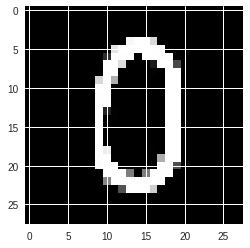

In [113]:
plt.imshow(img3.reshape((28,28)))

In [0]:
img4 = cv2.imread("6.jpg",0)
img4 = img4.astype('float32') / 255
img4 = cv2.resize(img4,(28,28))
img4 = img4.reshape((1,28,28,1))
prediction4 = model.predict(img4)

In [115]:
print(prediction4)
print("predicted class : ",np.argmax(prediction4))

[[8.4991772e-03 1.1934039e-05 5.6383407e-05 9.7769380e-06 2.6029488e-02
  3.2228208e-04 8.9015758e-01 2.7550684e-07 7.4691899e-02 2.2116193e-04]]
predicted class :  6


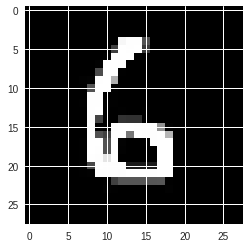

In [47]:
plt.imshow(img4.reshape(28,28))

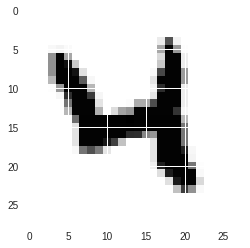

In [116]:
plt.imshow(train_data[20].reshape((28,28)))